#Data Science Pandas

Pandas is a library for data manipulation. It is highly compatible with Numpy, although it has some subtleties.



In [49]:
# import packages with alias
import numpy as np 
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

**Initializing tables form Numpy arrays**

You can pass a rank-2 Numpy array to the pd.DataFrame() constructor to initialize a pandas data-frame object.

In [ ]:
# set up a random seed 
np.random.seed(42) # this is the meaning of life , the universe and everything
M4 = np.random.randn(10,5)
M4

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272],
       [ 0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491],
       [-1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199],
       [-0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016]])

In [ ]:
# Convert this to a dataframe 
df = pd.DataFrame(M4)
df

,0,1,2,3,4
0,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383
5,0.110923,-1.150994,0.375698,-0.600639,-0.291694
6,-0.601707,1.852278,-0.013497,-1.057711,0.822545
7,-1.220844,0.208864,-1.959670,-1.328186,0.196861
8,0.738467,0.171368,-0.115648,-0.301104,-1.478522
9,-0.719844,-0.460639,1.057122,0.343618,-1.763040


**Renaming Columns**

We can access the column names of the table using .columns attribute:

We can rename the columns all at once by specifying a list with corresponding names:

In [ ]:
# re-assign 
df.columns = ["col1", "col2", "col3", "col4", "col5"]

# show 
df

,col1,col2,col3,col4,col5
0,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383
5,0.110923,-1.150994,0.375698,-0.600639,-0.291694
6,-0.601707,1.852278,-0.013497,-1.057711,0.822545
7,-1.220844,0.208864,-1.959670,-1.328186,0.196861
8,0.738467,0.171368,-0.115648,-0.301104,-1.478522
9,-0.719844,-0.460639,1.057122,0.343618,-1.763040


Now our data-frame has the input column names.

**Column selection**

We can select columns from a pandas dataframe using the `df['colname']` syntax. The result is a Pandas Series object, which is similar to a flat array, but integrates a number of properties and methods.

In [ ]:
col3 = df["col3"]  # bracket notation
# col3 = df.col3 
col3  

0    0.647689
1    0.767435
2    0.241962
3    0.314247
4    0.067528
5    0.375698
6   -0.013497
7   -1.959670
8   -0.115648
9    1.057122
Name: col3, dtype: float64

In [ ]:
type(col3)


pandas.core.series.Series

In [ ]:
# can also access shape attribute 
col3.shape


(10,)

There are number of built-in methods (see documentation), but as an illustration, we can obtain summary statistics by using the `describe()` method:

In [ ]:
col3.describe()

count    10.000000
mean      0.138287
std       0.822706
min      -1.959670
25%       0.006759
50%       0.278105
75%       0.579691
max       1.057122
Name: col3, dtype: float64

**Subsetting multiple columns**

Subsetting multiple columns with a list of defined columns outputs a pandas dataframe object.

In [ ]:
df_subset = df[["col1","col2"]] # double square brackets
df_subset 

,col1,col2
0,0.496714,-0.138264
1,-0.234137,1.579213
2,-0.463418,-0.465730
3,-0.562288,-1.012831
4,1.465649,-0.225776
5,0.110923,-1.150994
6,-0.601707,1.852278
7,-1.220844,0.208864
8,0.738467,0.171368
9,-0.719844,-0.460639


Note that the columns don’t have to be in any particular order; this is useful to re-order the table as we like:

In [ ]:
df_subset = df[["col3","col1"]] # double square brackets
df_subset

,col3,col1
0,0.647689,0.496714
1,0.767435,-0.234137
2,0.241962,-0.463418
3,0.314247,-0.562288
4,0.067528,1.465649
5,0.375698,0.110923
6,-0.013497,-0.601707
7,-1.959670,-1.220844
8,-0.115648,0.738467
9,1.057122,-0.719844


**Assigning columns**

Suppose we would like to obtain all the rows where a certain condition is satisfied. How can we do this? Take the following dummy data as an example:

In [ ]:
# come up with some data
M5 = np.array([["no","factor1",0],
               ["yes","factor2",2], 
               ["no","factor3",0], 
               ["no","factor4",2],
               ["yes","factor1", 1], 
               ["no","factor2",3],
               ["yes","factor5",3],
               ["no","factor1",0],
               ["yes","factor5",3],
               ["yes","factor1",2],
               ["yes","factor5",1],
               ["no","factor1",2],
               ["no","factor2",0],
               ["yes","factor1",1],
               ["no","factor3",2]
              ])

# create a dataframe with columns
df2 = pd.DataFrame(M5, columns=["Request","Factor","Impact"])
df2["Impact"] = df2["Impact"].astype(int)
df2

,Request,Factor,Impact
0,no,factor1,0
1,yes,factor2,2
2,no,factor3,0
3,no,factor4,2
4,yes,factor1,1
5,no,factor2,3
6,yes,factor5,3
7,no,factor1,0
8,yes,factor5,3
9,yes,factor1,2


How do we integrate an extra column to this data? We can simply assign an array, list or series of a compatible size (number of rows) with the df`['new_col'] = new_col` syntax:

In [ ]:
np.random.seed() # This will fix the random number generation

# create random uniform array of values with compatible shape
cs = np.random.uniform(low=-1, 
                       high=1, 
                       size=(M5.shape[0])) # create a random array 
print(cs.shape)

# Assign array to dataframe
df2["kll_index"] = cs 
display(df2)

(15,)


,Request,Factor,Impact,kll_index
0,no,factor1,0,0.812513
1,yes,factor2,2,-0.689905
2,no,factor3,0,-0.063373
3,no,factor4,2,-0.005186
4,yes,factor1,1,0.572231
5,no,factor2,3,0.836261
6,yes,factor5,3,-0.410296
7,no,factor1,0,-0.363929
8,yes,factor5,3,0.986815
9,yes,factor1,2,0.412429


Now suppose that we would like to fetch all records which satisfy a certain condition. This kind of selection can be done using the following syntax:

`df[condition]`

where condition is a NumPy array of booleans. Thanks to NumPy broadcasting, comparing a NumPy array/pandas series to one value will produce an array of the same kind where every value is compared to the query.

For example, comparing the Request column to the value no gives:

In [ ]:
condition = df2['Request'] == 'no'
condition

0      True
1     False
2      True
3      True
4     False
5      True
6     False
7      True
8     False
9     False
10    False
11     True
12     True
13    False
14     True
Name: Request, dtype: bool

Which indicates all the places where the condition is true. We can then use this array to select only the rows that are True, using the syntax mentioned above:

In [ ]:
df2[condition]

,Request,Factor,Impact,kll_index
0,no,factor1,0,0.812513
2,no,factor3,0,-0.063373
3,no,factor4,2,-0.005186
5,no,factor2,3,0.836261
7,no,factor1,0,-0.363929
11,no,factor1,2,0.054603
12,no,factor2,0,-0.556702
14,no,factor3,2,-0.138924


We can use logic to produce more complex queries. For example: fetch all the rows which have a negative consumption index or have an impact score greater than 1, and which have a service type of service1:

In [ ]:
df2 

,Request,Factor,Impact,kll_index
0,no,factor1,0,0.812513
1,yes,factor2,2,-0.689905
2,no,factor3,0,-0.063373
3,no,factor4,2,-0.005186
4,yes,factor1,1,0.572231
5,no,factor2,3,0.836261
6,yes,factor5,3,-0.410296
7,no,factor1,0,-0.363929
8,yes,factor5,3,0.986815
9,yes,factor1,2,0.412429


Here, we can code all of the three conditions that we require to extract the information

In [ ]:
condition1 = df2["Impact"] >= 2  
condition2 = df2["kll_index"] < 0 
condition3 = df2["Factor"] == "factor1"
df2_subset = df2[(condition1|condition2)&condition3]
df2_subset

,Request,Factor,Impact,kll_index
7,no,factor1,0,-0.363929
9,yes,factor1,2,0.412429
11,no,factor1,2,0.054603
13,yes,factor1,1,-0.205596


#Pandas apply
Following the previous example, imagine that we would like to apply a certain function to every value of a specific column, and obtain a series in which each element is the output of the applied function on the corresponding element. For these cases, we can use the apply() method of Pandas Series objects. In a data-frame, it would have the following syntax:

`df['column'].apply(func)`

where func can be any function which returns a single output.

Example: Apply a mapping to each of the services to a certain bin, and assign the resulting column to the dataframe.

In [ ]:
# suppose we have this mapping 
mapping = {"factor1":"NA", "factor2":"MX","factor3":"LX","factor4":"TY","factor5":"PSOX"}

# apply the mapping to the Service_type column and create a new one  
df2["EDX"] = df2["Factor"].apply(lambda x: mapping.get(x,"Not Found")) 

# display result 
df2

,Request,Factor,Impact,kll_index,EDX
0,no,factor1,0,0.812513,NA
1,yes,factor2,2,-0.689905,MX
2,no,factor3,0,-0.063373,LX
3,no,factor4,2,-0.005186,TY
4,yes,factor1,1,0.572231,NA
5,no,factor2,3,0.836261,MX
6,yes,factor5,3,-0.410296,PSOX
7,no,factor1,0,-0.363929,NA
8,yes,factor5,3,0.986815,PSOX
9,yes,factor1,2,0.412429,NA


**Pandas Loc**

Now imagine you would like to change a certain all rows in a certain column, when those rows satisfy a specified condition. The syntax for this is

`df.loc[condition, 'column'] = new_val`

Example: Set the Request value to "no" is Factor is of type 1:

In [ ]:
condition = df2["Factor"] == "factor1"
df2.loc[condition, "Request"] = "no" 
df2

,Request,Factor,Impact,kll_index,EDX
0,no,factor1,0,0.812513,NA
1,yes,factor2,2,-0.689905,MX
2,no,factor3,0,-0.063373,LX
3,no,factor4,2,-0.005186,TY
4,no,factor1,1,0.572231,NA
5,no,factor2,3,0.836261,MX
6,yes,factor5,3,-0.410296,PSOX
7,no,factor1,0,-0.363929,NA
8,yes,factor5,3,0.986815,PSOX
9,no,factor1,2,0.412429,NA


**Sorting a dataframe**

To sort a dataframe in a certain order, we can use the `sort_values()`. Use the `inplace=True` argument to change the original dataframe. You can sort by more than one column by specifying them in a list.

In [ ]:
df2.sort_values(by=["kll_index"], 
                ascending=True, 
                inplace=True) 
df2

,Request,Factor,Impact,kll_index,EDX
10,yes,factor5,1,-0.778954,PSOX
1,yes,factor2,2,-0.689905,MX
12,no,factor2,0,-0.556702,MX
6,yes,factor5,3,-0.410296,PSOX
7,no,factor1,0,-0.363929,NA
13,no,factor1,1,-0.205596,NA
14,no,factor3,2,-0.138924,LX
2,no,factor3,0,-0.063373,LX
3,no,factor4,2,-0.005186,TY
11,no,factor1,2,0.054603,NA


We see that the values have been updated accordingly.

**Resetting the index**

When sorting values, the index will change. We can reset it so that we obtain a sorted index once more:

In [ ]:
df2.reset_index(inplace=True)
df2

,index,Request,Factor,Impact,kll_index,EDX
0,10,yes,factor5,1,-0.778954,PSOX
1,1,yes,factor2,2,-0.689905,MX
2,12,no,factor2,0,-0.556702,MX
3,6,yes,factor5,3,-0.410296,PSOX
4,7,no,factor1,0,-0.363929,NA
5,13,no,factor1,1,-0.205596,NA
6,14,no,factor3,2,-0.138924,LX
7,2,no,factor3,0,-0.063373,LX
8,3,no,factor4,2,-0.005186,TY
9,11,no,factor1,2,0.054603,NA


**Dropping columns**

When resetting the index, the old index is kept as a column. We can drop any columns with the drop() method.

In [ ]:
df2.drop(columns=["index"], inplace=True)
df2

,Request,Factor,Impact,kll_index,EDX
0,yes,factor5,1,-0.778954,PSOX
1,yes,factor2,2,-0.689905,MX
2,no,factor2,0,-0.556702,MX
3,yes,factor5,3,-0.410296,PSOX
4,no,factor1,0,-0.363929,NA
5,no,factor1,1,-0.205596,NA
6,no,factor3,2,-0.138924,LX
7,no,factor3,0,-0.063373,LX
8,no,factor4,2,-0.005186,TY
9,no,factor1,2,0.054603,NA


**Aggregations**

Another useful thing to do with Matplotlib are aggregations. Suppose we would like to aggregate Impact counts for each of the EDXgroups. The syntax is as follows:

`df.groupby("column").agg_function().reset_index()`

The agg_function() is a pandas function such as sum() or mean() (see this article).

In [ ]:
df_agg = df2.groupby("EDX").sum().reset_index()
df_agg

,EDX,Impact,kll_index
0,LX,2,-0.202297
1,MX,5,-0.410345
2,NA,6,1.282251
3,PSOX,7,-0.202435
4,TY,2,-0.005186


#Matplotlib
As it name implies, this is Python’s main plotting library. A number of other libraries such as seaborn rely on this.

Text(0, 0.5, 'Consumption_index')

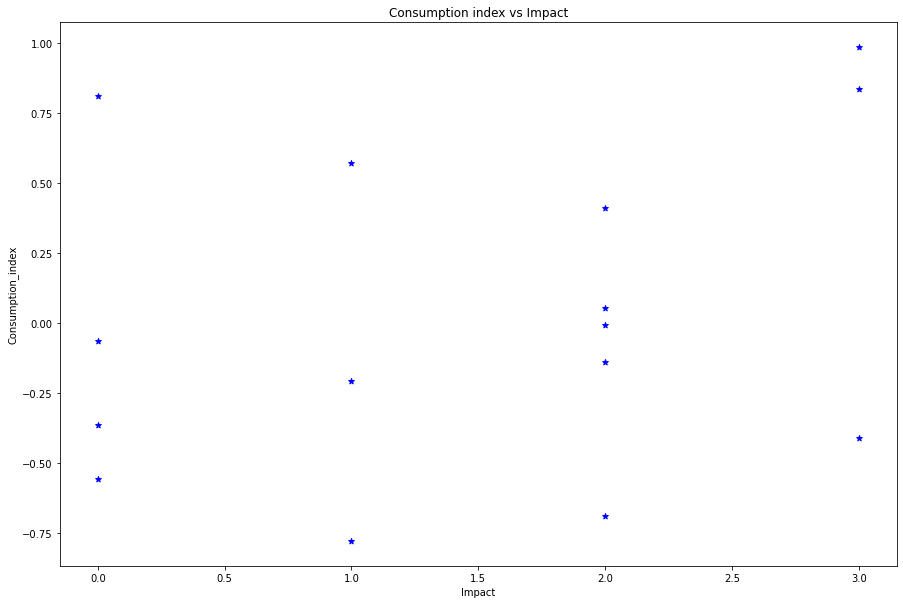

In [34]:
# specify figure to plot on 
plt.figure(figsize=(15,10)) 

# Obtain x and y arrays
x = df2["Impact"] 
y = df2["kll_index"]

# plot the scatterplot  
plt.scatter(x,y, color="blue", marker="*") 

# add title and labels  
plt.title("Consumption index vs Impact") 
plt.xlabel("Impact") 
plt.ylabel("Consumption_index")

Of course, it would make more sense with more data. Let’s generate this artificially:

Text(0, 0.5, 'Target')

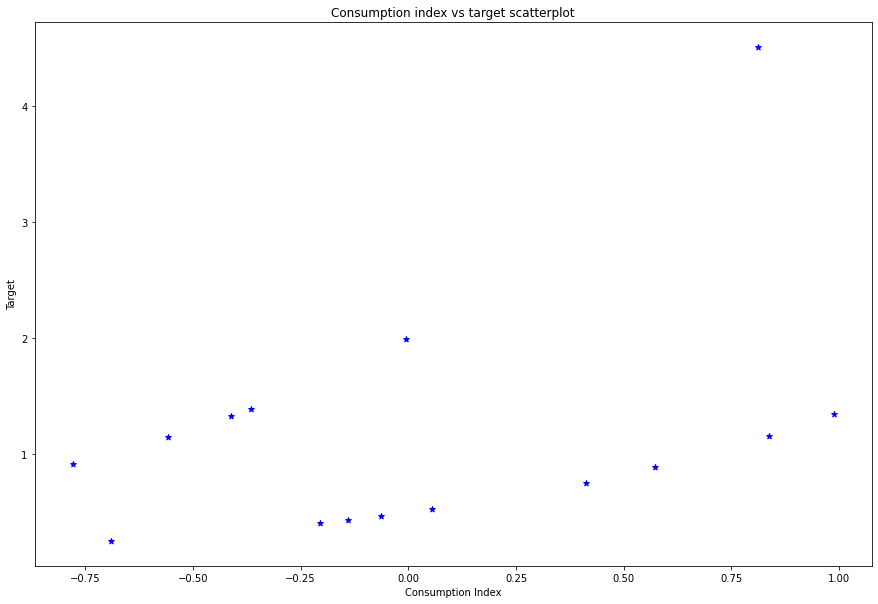

In [35]:
# create a correlated variable
df2["y"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-1,1) < 0 else np.exp(x)/2)

# specify figure to plot on 
plt.figure(figsize=(15,10)) 

# Obtain x and y arrays
x = df2["kll_index"] 
y = df2["y"]

# plot the scatterplot  
plt.scatter(x,y, color="blue", marker="*") 

# add title and labels  
plt.title("Consumption index vs target scatterplot") 
plt.xlabel("Consumption Index") 
plt.ylabel("Target")

**Plot**

If we would like to see the relationship in a linear way, sometimes it is preferable to use the plot function instead. The syntax is similar.

Text(0, 0.5, 'Target')

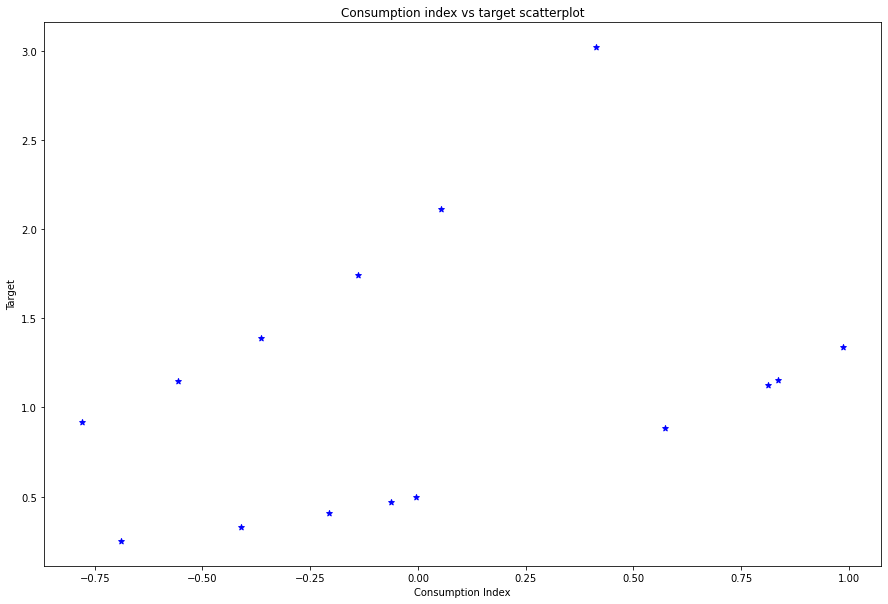

In [36]:
# create a correlated variable
df2["y"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-1,1) < 0 else np.exp(x)/2)

# specify figure to plot on 
plt.figure(figsize=(15,10)) 

# Obtain x and y arrays
x = df2["kll_index"] 
y = df2["y"]

# plot the scatterplot  
plt.scatter(x,y, color="blue", marker="*") 

# add title and labels  
plt.title("Consumption index vs target scatterplot") 
plt.xlabel("Consumption Index") 
plt.ylabel("Target")

Caution: Matplolib plot method will plot the given points in the order they are given.

**Overlayed plots**

We can overlay two plots which share the same x-axis values just by calling the plot function twice, with each y values:

Text(0, 0.5, 'Target')

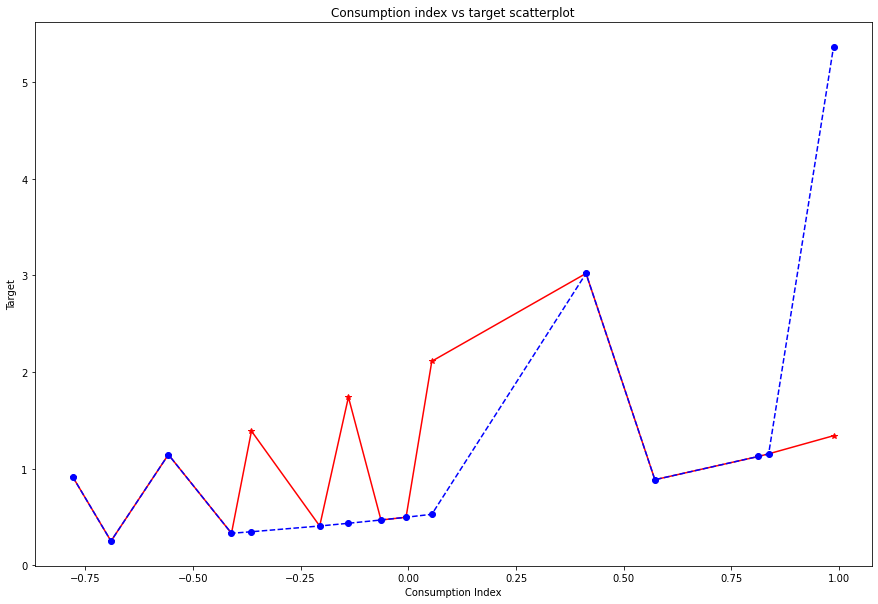

In [37]:
# some new data 
df2["y2"] = df2["kll_index"].apply(lambda x: np.exp(x)*2 if np.random.uniform(-0.5,2) < 0 else np.exp(x)/2)

# specify figure to plot on 
plt.figure(figsize=(15,10)) 

# Obtain x and y arrays
x = df2["kll_index"] 
y1 = df2["y"]
y2 = df2["y2"]

# plot the scatterplot  
plt.plot(x,y1, color="red", marker="*") 
plt.plot(x,y2, '--o', color="blue", marker="o") 

# add title and labels  
plt.title("Consumption index vs target scatterplot") 
plt.xlabel("Consumption Index") 
plt.ylabel("Target")

**Barplot**

One of the advantages of Pandas is that it integrates a number of common Matlotlib plots. For instance, we can plot a barplot with the plot() method. This can be combined with other matplotlib functions such as title(), xlabel(), etc.

In [38]:
df_agg

,EDX,Impact,kll_index
0,LX,2,-0.202297
1,MX,5,-0.410345
2,NA,6,1.282251
3,PSOX,7,-0.202435
4,TY,2,-0.005186


For instnace, we can use the df.plot.bar() method to create a barplot directly from the dataframe:

<Figure size 432x288 with 0 Axes>

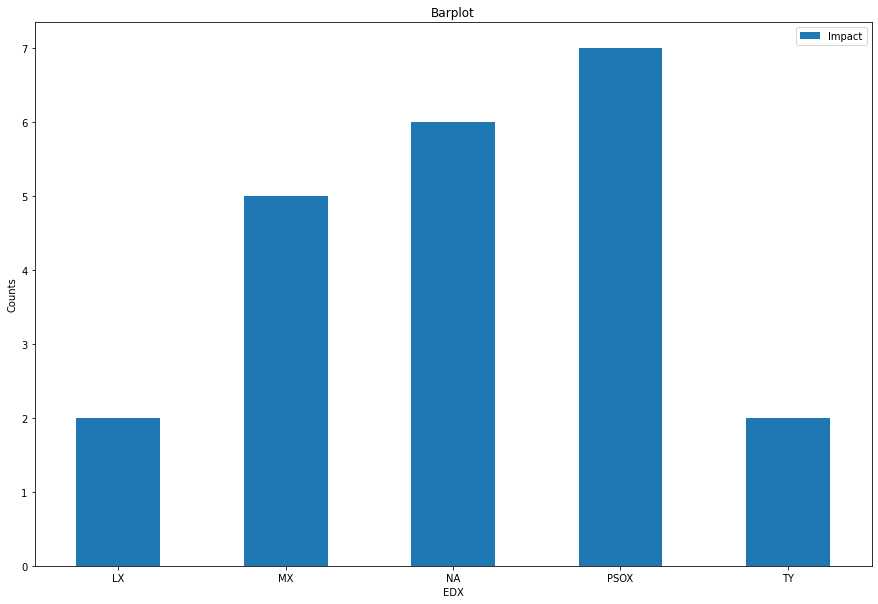

In [39]:
plt.figure() 
ax = df_agg.plot.bar(x='EDX', 
                     y='Impact', 
                     rot=0, 
                     figsize=(15,10))
plt.title("Barplot") 
plt.xlabel("EDX") 
plt.ylabel("Counts")
plt.show()

The figsize argument is the same as in figure(figsize=()) , and rot indicates the rotation of the labels. Of course, you can guess what x and y are used for here.

Group barplots can also be overlayed.

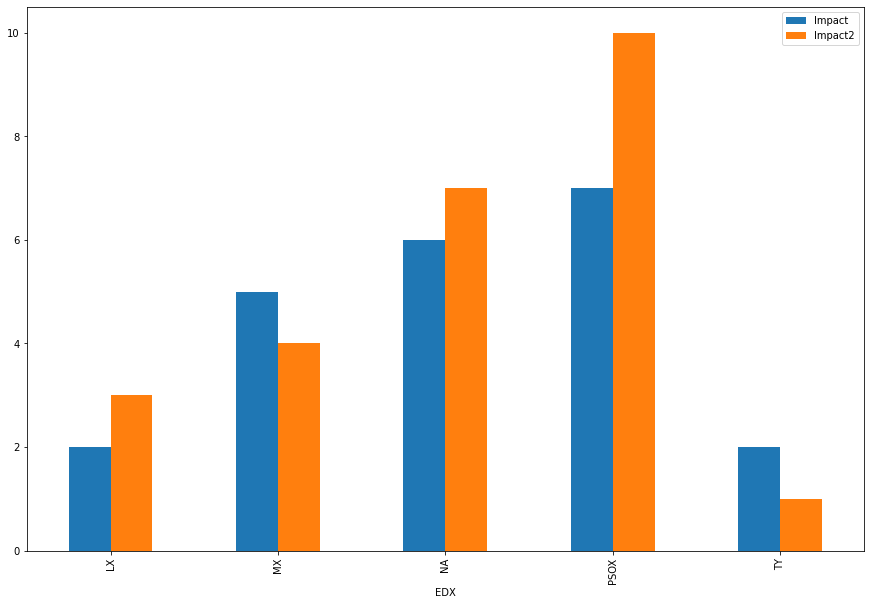

In [40]:
# Other counts
df_agg["Impact2"] = [3,4,7,10,1] # add new data
df_bar = df_agg[["EDX","Impact","Impact2"]]  # subset relevant columns
df_bar.set_index("EDX", inplace=True)  # update index for plotting
df_bar.plot.bar(figsize=(15,10))  # barplot 

**Piechart**

Using the same dataframe design, we can easily plot barcharts as follows:

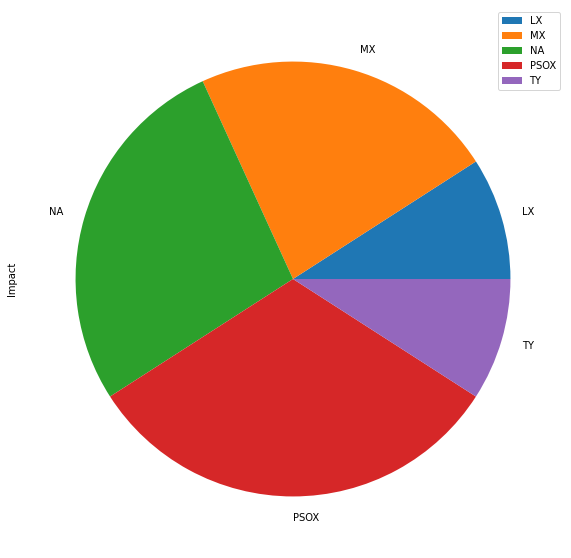

In [41]:
# pie chart for one target
df_bar.plot.pie(y='Impact',figsize=(15,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cabea37d0>,
      dtype=object)

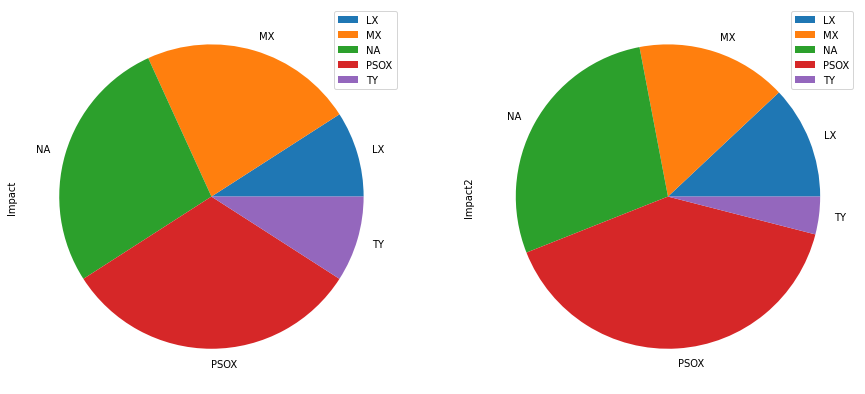

In [42]:
# Two targets 
df_bar.plot.pie(figsize=(15,10), subplots=True)  # barplot 

Enabling subplots=Trueallows for plotting different barplots for different count columns.

**Bonus: Seaborn!**

At times, there are some plot that are just inherently prettier or easier to produce with Searborn, a high-level Matplotlib wrapper library.

**Regression Plots**

For this example, we will use the Tips dataset provided by Searborn.

In [50]:
# Load preset Tip dataset \
tips_df = sns.load_dataset("tips") 
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


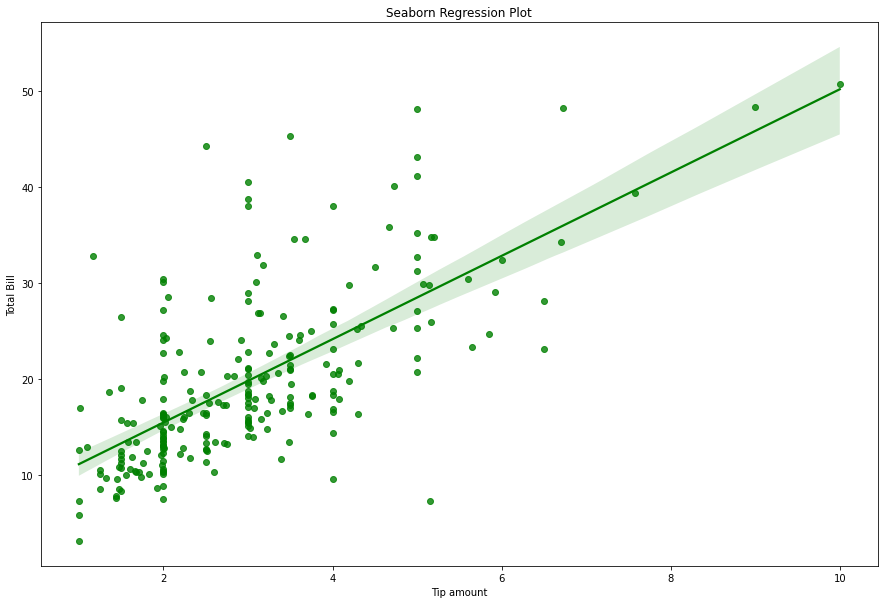

In [51]:
plt.figure(figsize=(15,10)) 
sns.regplot(x="tip", y="total_bill",  color="g",  data=tips_df) 
plt.title("Seaborn Regression Plot") 
plt.ylabel("Total Bill") 
plt.xlabel("Tip amount") 
plt.show()

Passing the x_bins argument aggregates continuous data into bins and provides additional lines indicating density of the bins:

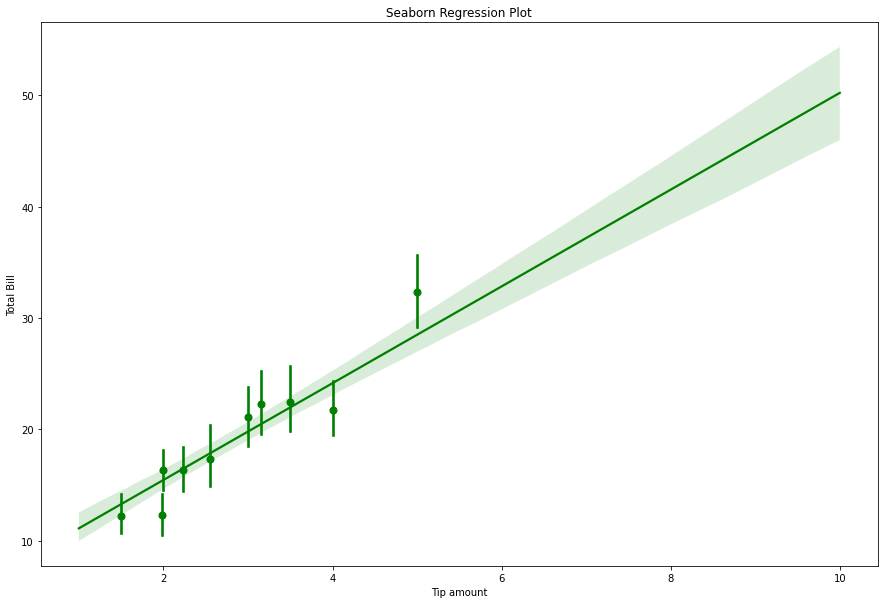

In [52]:
plt.figure(figsize=(15,10)) 
sns.regplot(x="tip", 
            y="total_bill", 
            color="g",
            x_bins=10, 
            data=tips_df) 
plt.title("Seaborn Regression Plot") 
plt.ylabel("Total Bill") 
plt.xlabel("Tip amount") 
plt.show()

**Box Plots**

Box plots are a quick way to visualize common distribution statistics of a vector of data, as illustrated in the following picture:

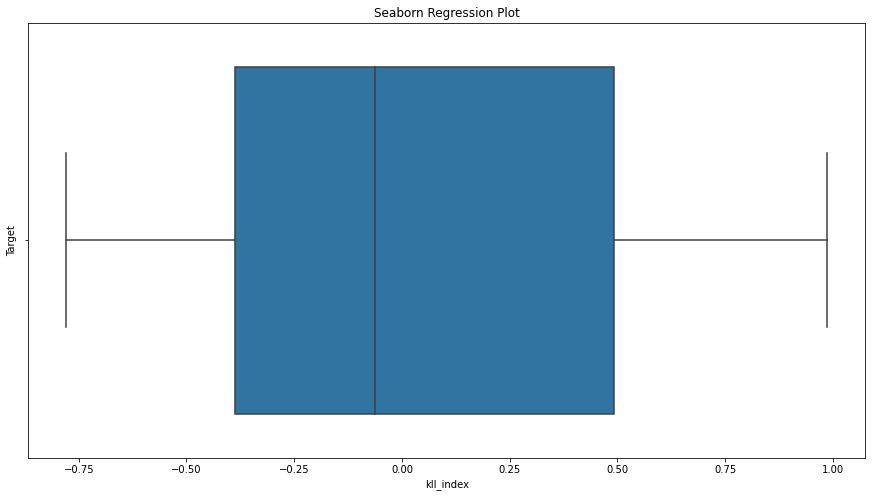

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(x="kll_index",data=df2)
plt.title("Seaborn Regression Plot")
plt.ylabel("Target")
plt.show()

**Distribution Plots**

Another interesting thing to obtain a full picture of the distribution of some data is by using a displot.

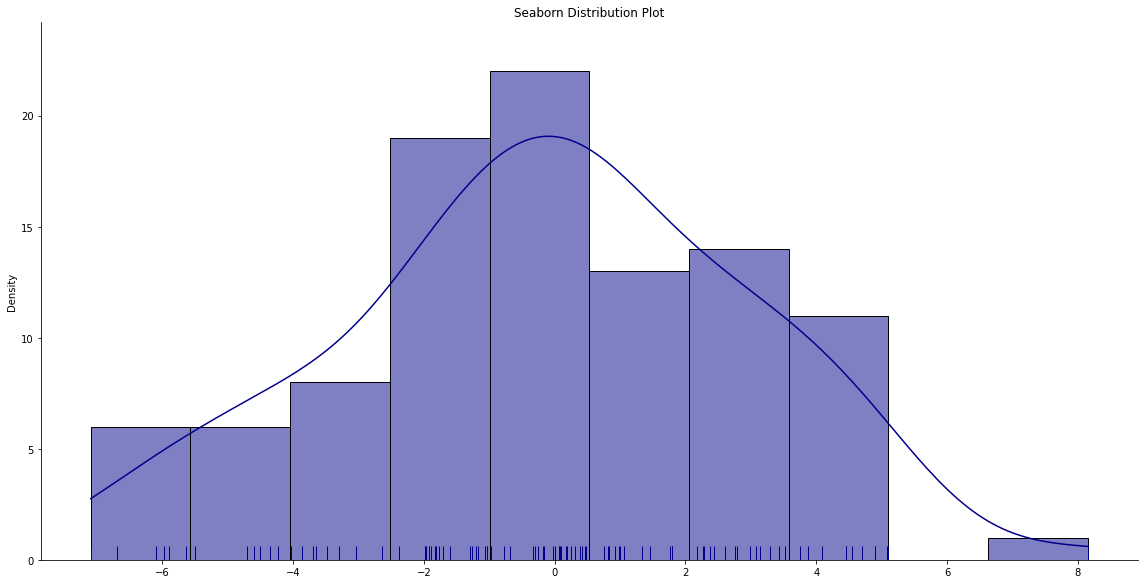

In [54]:
normal_data = np.random.normal(0, 3, 100)
ax = sns.displot(normal_data, 
                 kde=True, # Use kernel density estimation
                 rug=True, # show location of points 
                 bins=10, # number of histogram bins 
                 height=8 , # determines plot figure 
                 aspect=2, 
                 color="darkblue"
                ) 
plt.ylabel("Density") 
plt.title("Seaborn Distribution Plot")
plt.show()

**Pairplots**

Pairplots allow us to simultaneously see the correlation between out dataframe columns and the distributions of each, represented in a variety of ways. We will illustrate this with seaborn’s preloded penguins data.

In [55]:
penguins = sns.load_dataset("penguins")
penguins.dropna(subset=["bill_length_mm","flipper_length_mm"]) # minor cleaning 
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


We can simply use the pairplot function from Seaborn to produce the following plot:

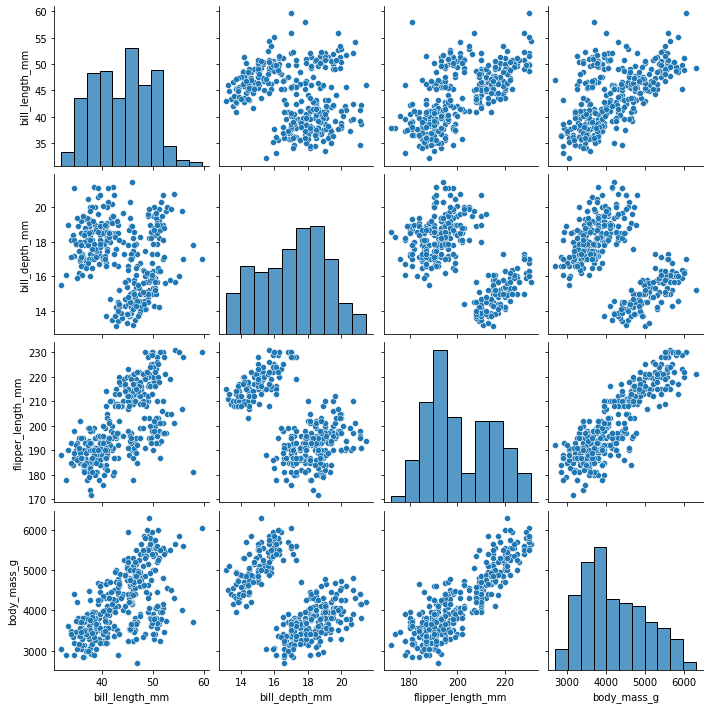

In [56]:
sns.pairplot(penguins)

Using the hue argument allows us to specify groups in the plot as well:

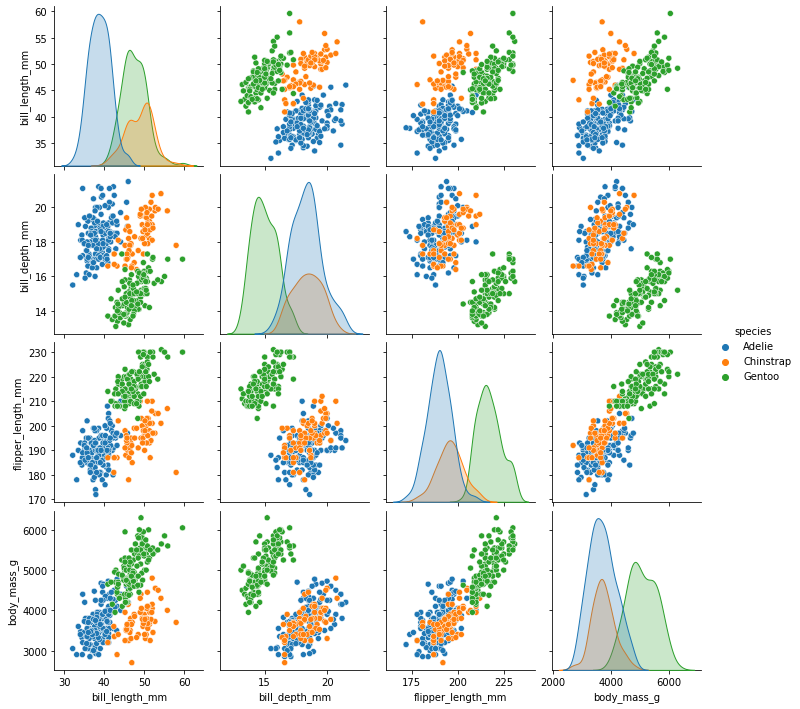

In [57]:
sns.pairplot(penguins, hue="species")